In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
data = pd.read_csv('Updated_Sales_Dataset.csv')

In [3]:
# Selecting relevant features for customer segmentation
segmentation_features = data[['Customer ID', 'Purchase Hour', 'Quantity', 'Price', ]]

# Handling missing values (if any)
segmentation_features = segmentation_features.dropna()

In [44]:
'''
# Encoding categorical variables
label_encoders = {}
for column in ['Product ID', 'Payment Method', 'Product Category', 'Customer Log Type', 'Promotion Used']:
    label_encoders[column] = LabelEncoder()
   segmentation_features[column] = label_encoders[column].fit_transform(segmentation_features[column])
'''

"\n# Encoding categorical variables\nlabel_encoders = {}\nfor column in ['Product ID', 'Payment Method', 'Product Category', 'Customer Log Type', 'Promotion Used']:\n    label_encoders[column] = LabelEncoder()\n   segmentation_features[column] = label_encoders[column].fit_transform(segmentation_features[column])\n"

In [7]:
# Display the preprocessed data
segmentation_features.head()

,Customer ID,Purchase Hour,Quantity,Price
0,1091,12,4,349.59
1,1034,15,2,264.19
2,1001,19,3,468.64
3,1014,12,8,231.71
4,1010,1,7,17.26


In [8]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
segmentation_features_scaled = scaler.fit_transform(segmentation_features)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


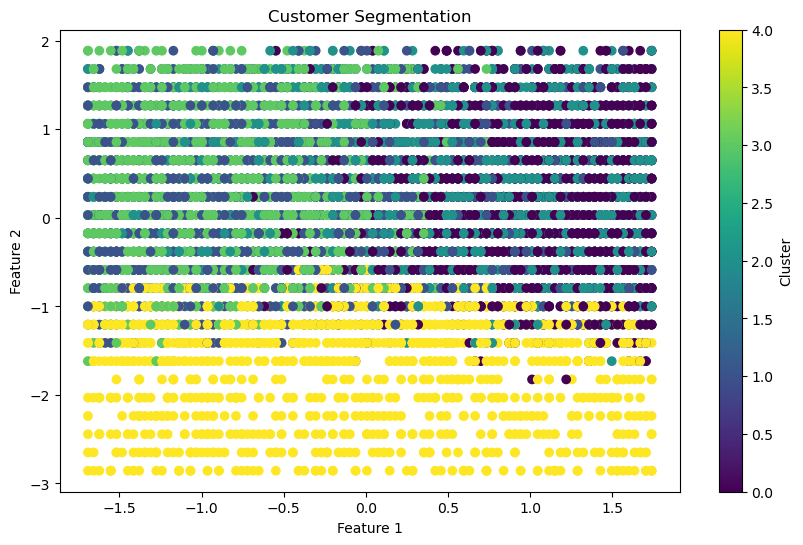

,Customer ID,Purchase Hour,Quantity,Price,Cluster
0,1091,12,4,349.59,0
1,1034,15,2,264.19,3
2,1001,19,3,468.64,3
3,1014,12,8,231.71,1
4,1010,1,7,17.26,4


In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying k-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_segments = kmeans.fit_predict(segmentation_features_scaled)

# Adding the cluster labels to the original dataframe
segmentation_features['Cluster'] = customer_segments

# Visualizing the clusters using the first two features for simplicity
plt.figure(figsize=(10, 6))
plt.scatter(segmentation_features_scaled[:, 0], segmentation_features_scaled[:, 1], c=customer_segments, cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# Display the first few rows with cluster labels
segmentation_features.head()


In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [37]:
# Selecting relevant features for churn prediction
churn_features = data[['Product ID', 'Quantity', 'Price', 'Discounts', 
                             'Payment Method', 'Product Category', 'Promotion Used', 
                             'Customer Log Type', 'Return Status']]

# Defining the target variable (churn)
churn_features['Churn'] = churn_features['Return Status'].apply(lambda x: 1 if x == 'Returned' else 0)

# Dropping the original 'Return Status' column
churn_features = churn_features.drop('Return Status', axis=1)

# Check unique values in the Churn column
print(churn_features['Churn'].unique())  # Should only show [0, 1]

valid_labels = [0, 1]
churn_features = churn_features[churn_features['Churn'].isin(valid_labels)]

# Handling missing values (if any)
churn_features = churn_features.dropna()

[1 0]


C:\Users\User\AppData\Local\Temp\ipykernel_17464\423306747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_features['Churn'] = churn_features['Return Status'].apply(lambda x: 1 if x == 'Returned' else 0)


In [38]:
# Encoding categorical variables
label_encoders = {}
for column in ['Product ID', 'Payment Method', 'Product Category', 'Customer Log Type', 'Promotion Used']:
    label_encoders[column] = LabelEncoder()
    churn_features[column] = label_encoders[column].fit_transform(churn_features[column])

# Splitting the dataset into training and testing sets
X = churn_features.drop('Churn', axis=1)
y = churn_features['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the decision tree classifier with limited depth
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.51
Precision: 0.50
Recall: 0.47
F1 Score: 0.49


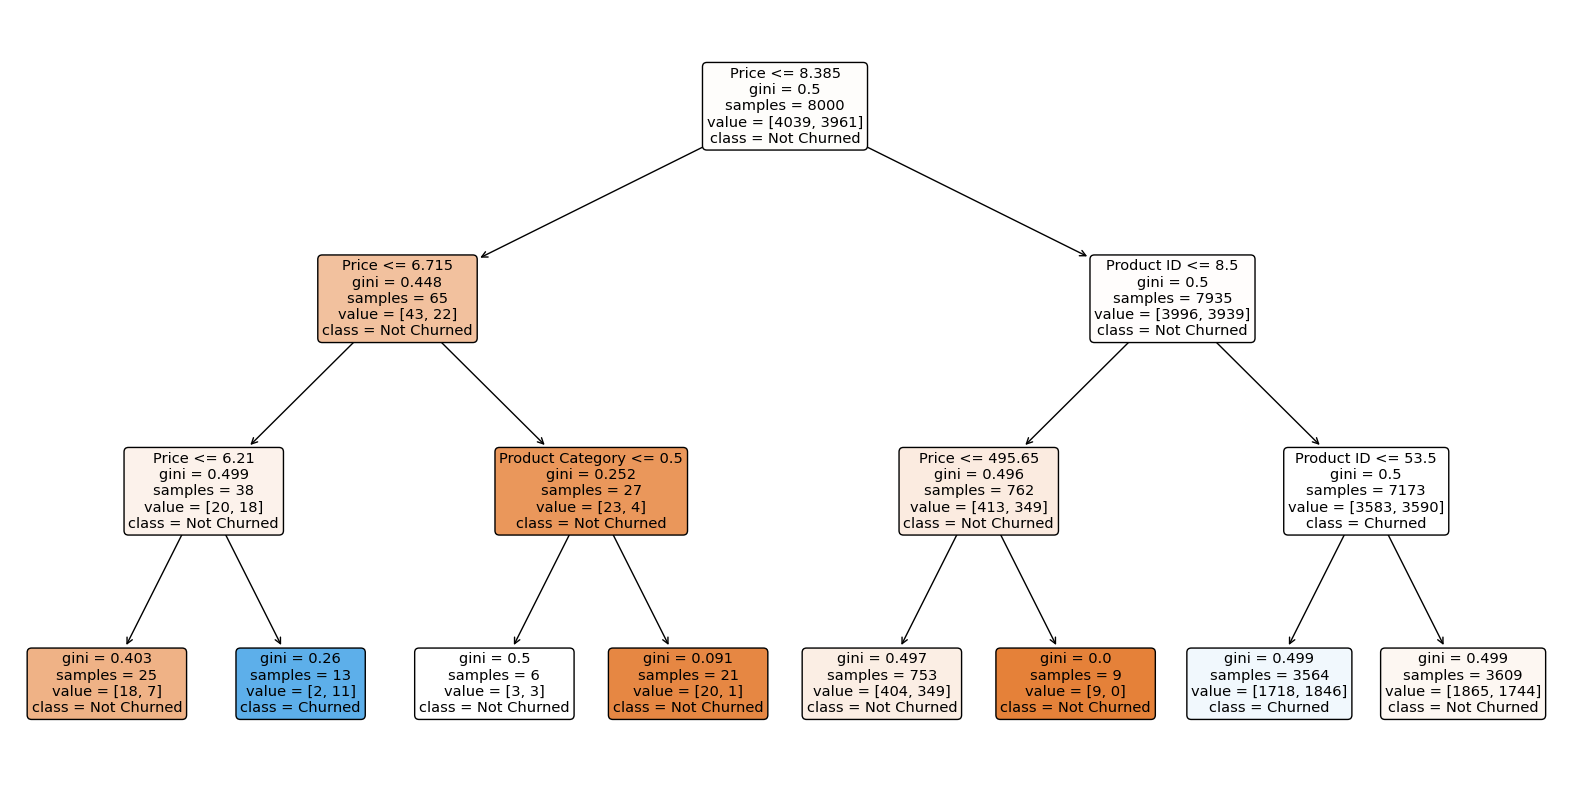

In [39]:
# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['Not Churned', 'Churned'], rounded=True)
plt.show()

In [40]:
# Extracting feature importances
feature_importances = clf.feature_importances_

# Creating a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importances_df)

             Feature  Importance
2              Price    0.645329
0         Product ID    0.276983
5   Product Category    0.077689
1           Quantity    0.000000
3          Discounts    0.000000
4     Payment Method    0.000000
6     Promotion Used    0.000000
7  Customer Log Type    0.000000


In [43]:
# Example new data
new_data = pd.DataFrame({
    'Product ID': [103],
    'Quantity': [2],
    'Price': [100.0],
    'Discounts': [0.1],
    'Payment Method': ['Cash'],  # Ensure this encoding matches the training data encoding
    'Product Category': ['Fashion'],  # Ensure this encoding matches the training data encoding
    'Promotion Used': ['No'],  # Ensure this encoding matches the training data encoding
    'Customer Log Type': ['Guest']  # Ensure this encoding matches the training data encoding
})

# Encode the categorical features
for column in ['Product ID', 'Payment Method', 'Product Category', 'Customer Log Type', 'Promotion Used']:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Predict churn
predictions = clf.predict(new_data)
print(f'Churn Prediction: {predictions[0]}')  # Output will be 0 or 1


Churn Prediction: 0
